In [1]:
import pandas as pd 

In [2]:
from pandas_profiling import ProfileReport

C:\Users\ELISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.DataFrame()
df = pd.read_csv('./House_Rent_Dataset.csv')
df.head()
# Just to read data and to know that every thing is working

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
all_data = pd.read_csv('./House_Rent_Dataset.csv')
all_data.head(8)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,29/04/2022,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,21/06/2022,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,21/06/2022,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent


### Pre - analysis Data Report

In [5]:
# minimal = True gives less information
# profile = ProfileReport(all_data, minimal = True)

# profile = ProfileReport(all_data)
# profile.to_file(output_file = "pre_analysis_report.html")

In [6]:
# Checking the Data Types of the Columns
data_types = all_data.dtypes
print(data_types)


Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [7]:
all_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
# To identify outlier in Rent of apartments or houses
all_data['Rent'].min()
all_data['Rent'].max()

# The maximum rent her can be market as an outlier



3500000

In [9]:
all_data['BHK'].max()
all_data['BHK'].min()


1

#### Task 01:  Renaming Columns Names That are unambigous 

In [10]:
# all_data.columns
all_data.head()

# replace BHK to Rooms 
# date of Post 
# size to Size(Sq.ft)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [11]:
all_data.rename(columns = {'BHK':'No. of Rooms', 'Size': 'Size(Sq.ft)'}, inplace = True)
all_data.head()

,Posted On,No. of Rooms,Rent,Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
all_data.rename(columns = {'Posted On':'Date of Post', 'Rent':'Rent(Rs)'}, inplace = True)
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date of Post       4746 non-null   object
 1   No. of Rooms       4746 non-null   int64 
 2   Rent(Rs)           4746 non-null   int64 
 3   Size(Sq.ft)        4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Task 2 : Change Data type of Date of Post

In [14]:

# Using DataFrame.astype() function
# df["InsertedDate"] = df["InsertedDate"].astype('datetime64[ns]')

# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
# df["InsertedDates"] =  pd.to_datetime(df["InsertedDates"], format="%Y/%m/%d")

all_data['Date of Post'] = all_data['Date of Post'].astype('datetime64')


C:\Users\ELISHA\AppData\Local\Temp\ipykernel_22736\2430170585.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  all_data['Date of Post'] = all_data['Date of Post'].astype('datetime64')


In [15]:
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-04-07,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-09-05,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Task 3 : Remove Null values from the dataset


In [16]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()



,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


In [17]:
nan_df.sum()


C:\Users\ELISHA\AppData\Local\Temp\ipykernel_22736\1280328097.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nan_df.sum()


No. of Rooms         0.0
Rent(Rs)             0.0
Size(Sq.ft)          0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

##### (There is no null values in the columns of the datasets)

#### Task 4 : Remove Duplicate values from the dataset

In [18]:
df_duplicate = all_data.duplicated().sum()
print(df_duplicate)


0


##### (There is no Duplicate values in the columns of the datasets)

#### Task 5 : Remove useless colums from the data set from the dataset

In [19]:
# all_data.drop(['Date of Post'], axis = 'columns', inplace = True)
# all_data.head()

# Successfully Deleted!!!

In [20]:
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-04-07,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-09-05,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Task 5 : Split Floor in no. of floor and floor availabe for rent

In [21]:
all_data['Floor Number'] = all_data['Floor'].str[0]
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,G
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
3,2022-04-07,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1
4,2022-09-05,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1


In [22]:
# all_data['Total Floors'] = all_data['Floor'].str[-1]
# This can Also be used

# Trying New Method
all_data['Total Floors'] = all_data['Floor'].apply(lambda x: str(x).split()[-1])
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,G,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-04-07,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-09-05,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [23]:
# Delete Floors
del all_data['Floor']

In [24]:
# Change Ground to 0

all_data['Floor Number'] = all_data['Floor Number'].replace(['G'],0)

In [25]:
all_data.head()

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-04-07,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-09-05,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


### Post analysis Data Report


In [26]:
print(all_data.dtypes )

Date of Post         datetime64[ns]
No. of Rooms                  int64
Rent(Rs)                      int64
Size(Sq.ft)                   int64
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
Floor Number                 object
Total Floors                 object
dtype: object


In [27]:
temp = all_data[all_data['Floor Number'].str[0] == 'U']
temp.head()

# This columns contains some records as 'U'

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
290,2022-06-29,1,3500,200,Super Area,Baguihati,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,U,4
549,2022-02-06,2,8000,650,Carpet Area,"Nakoda Heights, Nalasopara",Mumbai,Semi-Furnished,Family,2,Contact Agent,U,9
559,2022-05-22,1,30000,488,Carpet Area,"Kyraa Ariso Apartment, Chembur",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner,U,16
631,2022-04-06,4,310000,2600,Carpet Area,Lokhandwala Complex,Mumbai,Unfurnished,Family,4,Contact Agent,U,20
633,2022-06-07,3,65000,950,Carpet Area,Tilak Nagar - Harbour Line,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent,U,9


In [28]:
all_data = all_data[all_data['Floor Number'].str[0] != 'U']

# All rows containing 'U' is removed


In [29]:
# all_data.count() 


In [30]:
# minimal = True gives less information
# profile = ProfileReport(all_data, minimal = True)

# profile = ProfileReport(all_data)
# profile.to_file(output_file = "post_analysis_report.html")

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
all_data.head(1)

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2


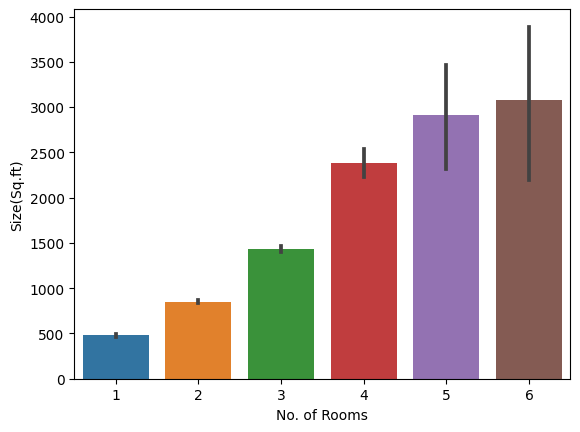

In [33]:
sns.barplot(x = all_data['No. of Rooms'], y = all_data['Size(Sq.ft)'], data = all_data)
plt.show()

In [34]:
mean_size=all_data.groupby('No. of Rooms')['Size(Sq.ft)'].mean().sort_values()
print(mean_size)

No. of Rooms
1     479.514236
2     852.340426
3    1432.350412
4    2381.031915
5    2910.947368
6    3075.000000
Name: Size(Sq.ft), dtype: float64


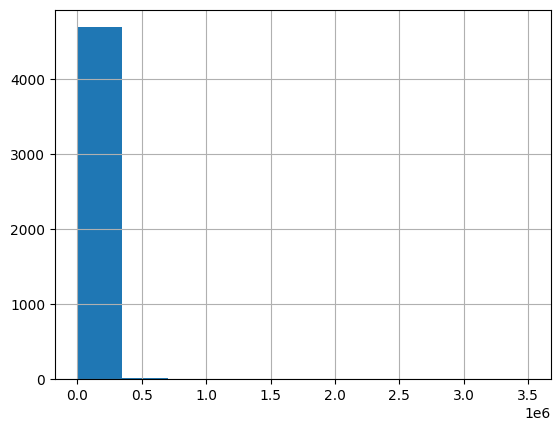

In [35]:
all_data['Rent(Rs)'].hist()
plt.show()

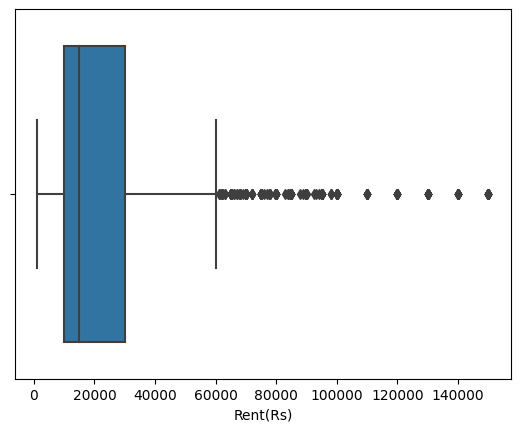

In [36]:
# when the chart's tail is longer on its right side and its peak veers to the left

sns.boxplot(x = all_data['Rent(Rs)'][all_data['Rent(Rs)'] <= 150000])
plt.show()



In [37]:
# This shows that the average rent of a house is between is 10 thousands and 30 thousands.

##### Now lets calculate the averagerent of every city

In [38]:
all_data.head(1)

,Date of Post,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2


In [39]:
mean_rent_ofCities = all_data.groupby('City')['Rent(Rs)'].mean().sort_values()
print(mean_rent_ofCities)

City
Kolkata      11660.747610
Hyderabad    20583.177289
Chennai      21629.388764
Bangalore    24983.276836
Delhi        29461.983471
Mumbai       85248.914316
Name: Rent(Rs), dtype: float64


<AxesSubplot:xlabel='City'>

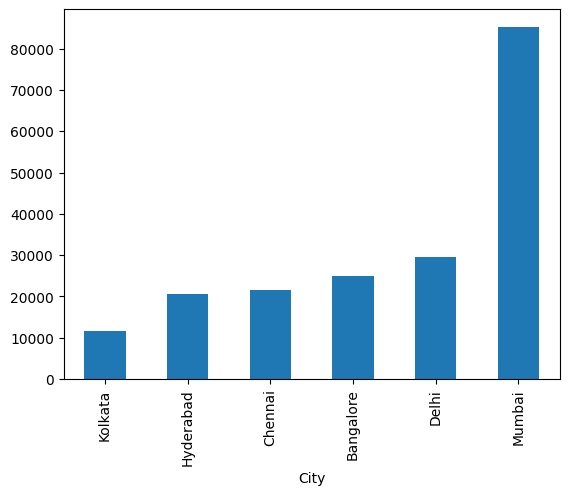

In [40]:
mean_rent_ofCities.plot(kind="bar")

In [41]:
# This shows that the city with the highest average of rent is Mumbai, Which also clearify the assumptions that it is a metropolitan city

#### DroppingSeless colums (like: Posted on and Area Locality )

In [42]:
all_data.drop(["Date of Post"], axis="columns", inplace=True)
all_data.drop(["Area Locality"], axis="columns", inplace=True)

In [43]:
all_data.head()

,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


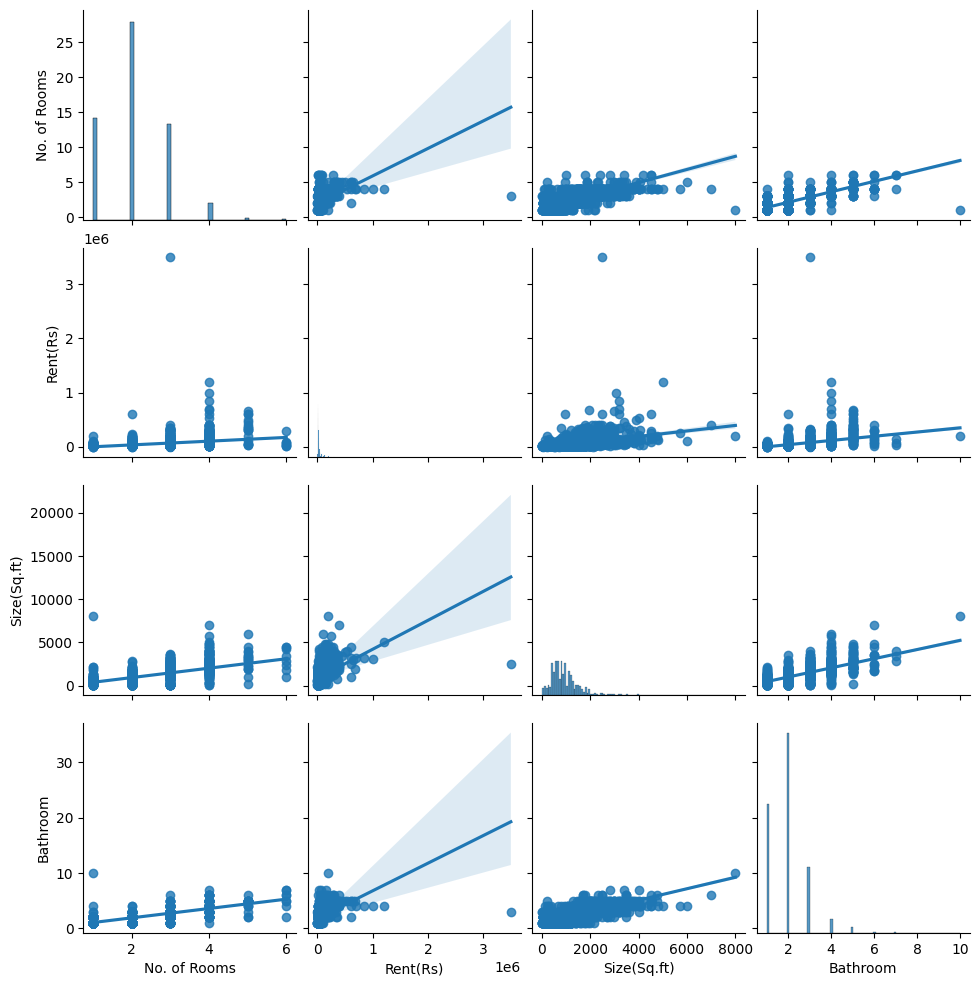

In [44]:
sns.pairplot(all_data, kind="reg")
plt.show()

#### We have already changed our catagorial values to numerical, but here is need to change the value of "Upper " and "Lowe" to -1 and -2

In [45]:
all_data.head()
all_data["Floor Number"].value_counts()

1    1493
2    1004
0     927
3     532
4     284
5     167
6      99
7      75
8      66
9      65
L      11
Name: Floor Number, dtype: int64

In [46]:
all_data["Floor Number"] = all_data["Floor Number"].replace(['L'],-2)


In [47]:
all_data["Floor Number"].value_counts()

1     1493
2     1004
0      927
3      532
4      284
5      167
6       99
7       75
8       66
9       65
-2      11
Name: Floor Number, dtype: int64

In [48]:
all_data["Total Floors"].value_counts()

4         935
3         913
2         866
5         421
1         335
         ... 
85          1
71          1
81          1
66          1
Ground      1
Name: Total Floors, Length: 67, dtype: int64

In [49]:
all_data["Total Floors"] = all_data["Total Floors"].replace(['Ground'],1)

In [50]:
# The Ground Value is now being changes to 1

In [51]:
all_data["Total Floors"].value_counts()

4     935
3     913
2     866
5     421
1     335
     ... 
85      1
71      1
81      1
66      1
1       1
Name: Total Floors, Length: 67, dtype: int64

In [52]:
all_data["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

<AxesSubplot:xlabel='Area Type'>

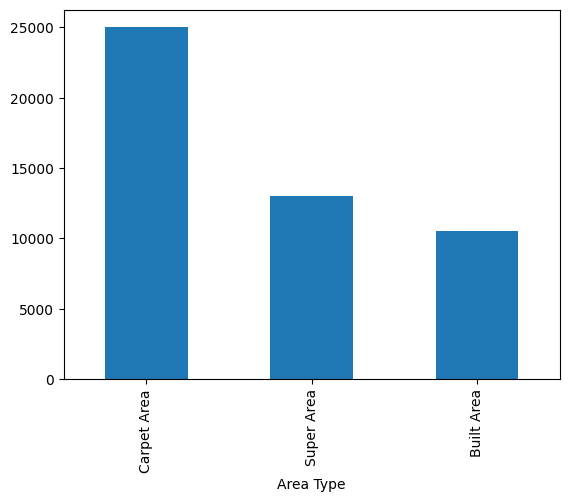

In [53]:
all_data.groupby('Area Type')['Rent(Rs)'].median().sort_values(ascending=False).plot(kind='bar')

#### We have 3 values in the "Area Type" column. Which will bw now changed to  Super Area =0, Carpet Area= 1, Built Area =2.



In [54]:
# Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very
# efficient tool for encoding the levels of categorical features into numeric values.
# LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels

In [55]:
from sklearn import preprocessing

In [56]:
 label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column "Area Type".
all_data["Area Type"]= label_encoder.fit_transform(all_data["Area Type"])
  
all_data["Area Type"].unique()

array([2, 1, 0])

In [57]:
all_data["Furnishing Status"].unique()


array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

<AxesSubplot:xlabel='Furnishing Status'>

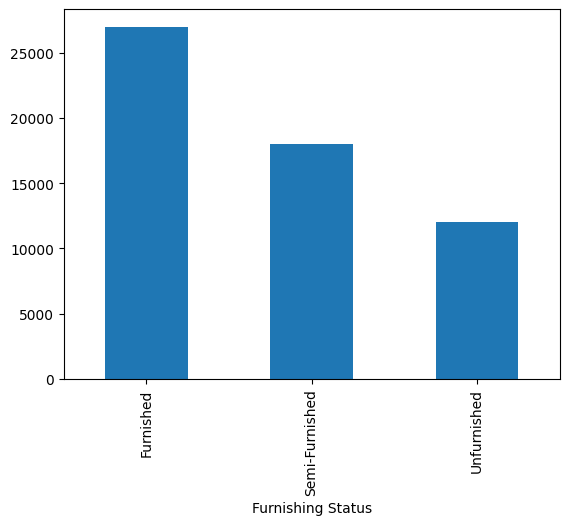

In [58]:
all_data.groupby('Furnishing Status')['Rent(Rs)'].median().sort_values(ascending=False).plot(kind='bar')

In [59]:
# This shows that furnished house is so far the most expensive house

In [60]:
# From now on Unfurnished =0, Semi-Furnished= 1, Furnished =2.

In [61]:
label_encoder = preprocessing.LabelEncoder()

all_data["Furnishing Status"]= label_encoder.fit_transform(all_data["Furnishing Status"])
  
all_data["Furnishing Status"].unique()

array([2, 1, 0])

In [62]:
all_data["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

<AxesSubplot:xlabel='Tenant Preferred'>

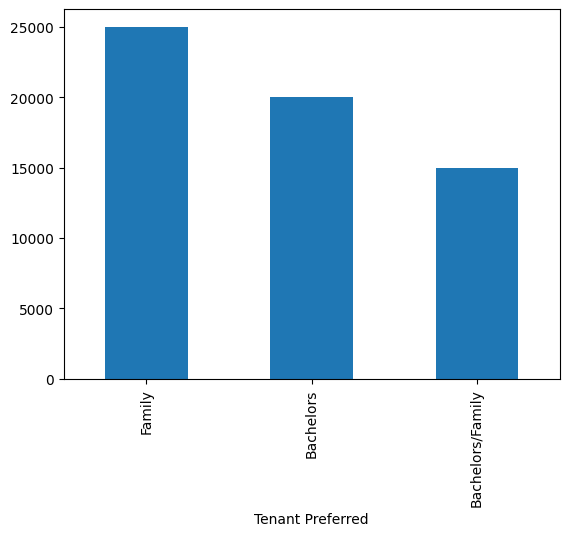

In [63]:
all_data.groupby("Tenant Preferred")['Rent(Rs)'].median().sort_values(ascending=False).plot(kind='bar')

In [64]:
# From now on Bachelors/Family =0, Bachelors= 1, Family =2.

In [65]:
all_data.head()

,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2,10000,1100,2,Kolkata,2,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,2,Kolkata,1,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,2,Kolkata,1,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,2,Kolkata,2,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,1,Kolkata,2,Bachelors,1,Contact Owner,1,2


In [66]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
all_data["Tenant Preferred"]= label_encoder.fit_transform(all_data["Tenant Preferred"])
  
all_data["Tenant Preferred"].unique()

array([1, 0, 2])

In [67]:
all_data["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [68]:
# From now on 'Contact Owner' =0, Contact Agent= 1, Contact Builder =2.

In [69]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
all_data["Point of Contact"]= label_encoder.fit_transform(all_data["Point of Contact"])
  
all_data["Point of Contact"].unique()


array([2, 0, 1])

In [70]:
all_data.head()

,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2,10000,1100,2,Kolkata,2,1,2,2,0,2
1,2,20000,800,2,Kolkata,1,1,1,2,1,3
2,2,17000,1000,2,Kolkata,1,1,1,2,1,3
3,2,10000,800,2,Kolkata,2,1,1,2,1,2
4,2,7500,850,1,Kolkata,2,0,1,2,1,2


In [71]:
all_data["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

<AxesSubplot:xlabel='City'>

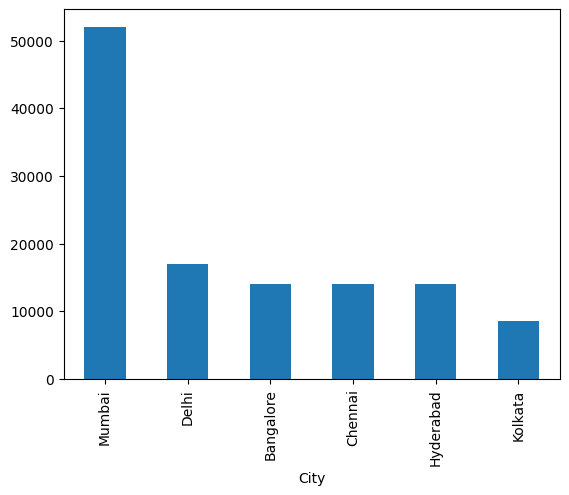

In [72]:
all_data.groupby("City")['Rent(Rs)'].median().sort_values(ascending=False).plot(kind='bar')

In [73]:
# We have 6 unique cites, which will be now be represented as 'Kolkata':0,'Mumbai':1,'Bangalore':2,'Delhi':3,'Chennai':4,'Hyderabad':5.

In [74]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
all_data['City']= label_encoder.fit_transform(all_data['City'])
  
all_data['City'].unique()

array([4, 5, 0, 2, 1, 3])

In [75]:
all_data.head(20)

,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2,10000,1100,2,4,2,1,2,2,0,2
1,2,20000,800,2,4,1,1,1,2,1,3
2,2,17000,1000,2,4,1,1,1,2,1,3
3,2,10000,800,2,4,2,1,1,2,1,2
4,2,7500,850,1,4,2,0,1,2,1,2
5,2,7000,600,2,4,2,1,2,2,0,1
6,2,10000,700,2,4,2,0,2,0,0,4
7,1,5000,250,2,4,2,0,1,0,1,2
8,2,26000,800,1,4,2,0,2,0,1,2
9,2,10000,1000,1,4,1,1,2,2,1,3


In [76]:
# Our rent value and Size of the houses are so high, 
# it is better to use minmax_scale to change these values from 0 to 1.

In [77]:
#min-max scale
from sklearn.preprocessing import minmax_scale

all_data["Rent(Rs)"] = minmax_scale(all_data["Rent(Rs)"])

In [78]:
print(all_data['Rent(Rs)'])

0       0.002515
1       0.005373
2       0.004516
3       0.002515
4       0.001801
          ...   
4741    0.003944
4742    0.007946
4743    0.009660
4744    0.012519
4745    0.003944
Name: Rent(Rs), Length: 4723, dtype: float64


In [79]:
all_data["Size(Sq.ft)"] = minmax_scale(all_data["Size(Sq.ft)"])

In [80]:
all_data.head()

,No. of Rooms,Rent(Rs),Size(Sq.ft),Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2,0.002515,0.136421,2,4,2,1,2,2,0,2
1,2,0.005373,0.098874,2,4,1,1,1,2,1,3
2,2,0.004516,0.123905,2,4,1,1,1,2,1,3
3,2,0.002515,0.098874,2,4,2,1,1,2,1,2
4,2,0.001801,0.105131,1,4,2,0,1,2,1,2


## Machine Learning Modeling

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
X=all_data.drop('Rent(Rs)',axis=1)
y=all_data['Rent(Rs)']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [84]:
all_data['Rent(Rs)'].head(10)

0    0.002515
1    0.005373
2    0.004516
3    0.002515
4    0.001801
5    0.001658
6    0.002515
7    0.001086
8    0.007088
9    0.002515
Name: Rent(Rs), dtype: float64

### TESTING & TRAINING  MODELS. 

In [ ]:
# LINEAR REGRESSION MODEL

In [121]:
linear = LinearRegression()
linear.fit(X_train, y_train)
print("Linear Regression Training Accuracy:", linear.score(X_train,y_train))
print("Linear Regression Testing Accuracy:", linear.score(X_test,y_test))

Linear Regression Training Accuracy: 0.27034385016726425
Linear Regression Testing Accuracy: 0.49773924020286153


In [110]:
# RANDOM FOREST MODEL 
from sklearn.ensemble import RandomForestRegressor

In [114]:
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test,y_test))

Random Forest Training Accuracy: 0.8596725663964823
Random Forest Testing Accuracy: 0.15399015930829096


In [98]:
#DECISION TREE MODEL
from sklearn.tree import DecisionTreeRegressor

In [137]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
print("Decision Tree Training Accuracy:", tree_model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", tree_model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.999862106726364
Decision Tree Testing Accuracy: -8.926464036726045


In [147]:
# from sklearn.linear_model import LogisticRegression

# Cannot fit this as this is a classification method and the values that should be used here is 'Continous'

In [148]:
# logistic = LogisticRegression()
# logistic.fit(X_train, y_train)
# print("Logistic Regression Training Accuracy:", logistic.score(X_train,y_train))
# print("Logistic Regression Testing Accuracy:", logistic.score(X_test,y_test))

In [151]:
# Evaluating Models Based on the following
from  sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [152]:
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print('Mean Absoloute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [153]:
evaluate(LinearRegression())

Mean Absoloute Error: 0.006283273660130485
Mean Squared Error: 0.010024066185107726
R2 Score: 0.49773924020286153


In [154]:
evaluate(RandomForestRegressor())

Mean Absoloute Error: 0.0036094531183901535
Mean Squared Error: 0.013583188524458634
R2 Score: 0.07775808802530126


In [155]:
evaluate(DecisionTreeRegressor())

Mean Absoloute Error: 0.005486421345973192
Mean Squared Error: 0.04449360311586035
R2 Score: -8.895472847965568


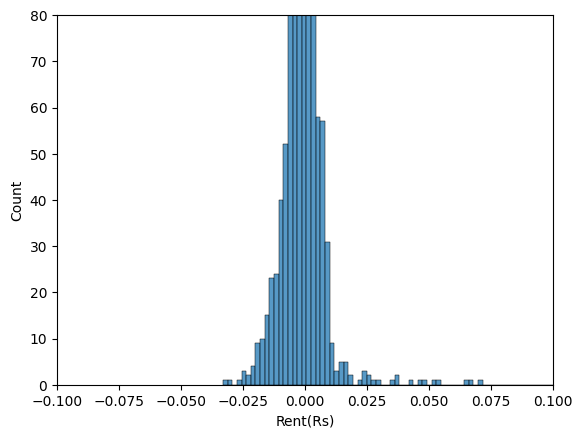

In [156]:
model=LinearRegression()
model.fit(X_train,y_train)
pred_y=np.exp(model.predict(X_test))
sns.histplot(np.exp(y_test)-pred_y)
plt.xlim(-0.1,0.1)
plt.ylim(0,80)
plt.show()


##### Remove Tenant preferred and Point of contact
